In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import tensorflow as tf
from pprint import pprint

In [2]:
import gensim
import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
from pprint import pprint
t = RegexpTokenizer("[A-Za-z]+")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
lyrics = pd.read_csv('lyrics.csv')

In [4]:
lyrics.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [5]:
set(list(lyrics['genre']))

{'Country',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Metal',
 'Not Available',
 'Other',
 'Pop',
 'R&B',
 'Rock'}

In [6]:
# w2v용 sentence만들고 에러나는것 인덱스 저장
sentences = []
err = []
for idx, el in enumerate(lyrics['lyrics']): 
    try:
        elt = t.tokenize(el) # 비단어문자 제거, 토크나이징
        elt = [ i.lower() for i in elt] # 소문자로 통일
        sentences.append(models.doc2vec.LabeledSentence(words=elt, tags=['r%d'%idx]))
    except:
        err.append(idx)
        

In [7]:
len(err)

95680

In [8]:
# 토크나이징된 가사 추가
temp=np.array(sentences)
tok=[i[0] for i in temp]
tok_len=[len(i[0]) for i in temp]
# 200 단어 넘는 노래 수
sum([i>200 for i in tok_len])

134107

In [9]:
# 에러 row 제거
df = lyrics.drop(err, axis=0)

In [10]:
df = df.reset_index()

In [11]:
# 200자 이상인지 true/false 컬럼 만들기
le = []
for i in tok:
    le.append(len(i)>200)

In [12]:
print(len(tok), len(le), len(df))

266557 266557 266557


In [13]:
tok_merged = [' '.join(i) for i in tok]

In [18]:
l = pd.DataFrame(le, columns=['len'])
t = pd.DataFrame(tok_merged, columns=['tok'])
df2 = pd.concat([df, l, t], axis=1)

In [19]:
# 단어 200개 이상만 남기기
df2 = df2[df2['len']==True]

In [20]:
df2 = df2.drop(['level_0','index','song','year','artist','lyrics','len'], axis=1)
df2.rename(columns={'genre':'y'})

,y,tok
0,Pop,oh baby how you doing you know i m gonna cut r...
1,Pop,playin everything so easy it s like you seem s...
3,Pop,oh oh oh i oh oh oh i verse if i wrote a book ...
4,Pop,party the people the people the party it s pop...
6,Pop,this is just another day that i would spend wa...
7,Pop,waiting waiting waiting waiting waiting waitin...
8,Pop,verse i read all of the magazines while waitin...
9,Pop,n n now honey you better sit down and look aro...
10,Pop,i lay alone awake at night sorrow fills my eye...
11,Pop,hello hello baby you called i can t hear a thi...


In [22]:
df2.to_csv('lyrics_refine.csv', index=False)

In [ ]:
# ---------------여기부터 w2v
# w2v model 만들기 5~10분쯤 걸림
embed_dim = 200
model = models.Word2Vec(tok, size=embed_dim, window=7, min_count=3, workers=8)

In [31]:
model['she']

array([  1.28687263e-01,  -9.69191492e-01,  -4.36079353e-01,
        -8.68235111e-01,  -1.42763972e+00,   7.01574147e-01,
        -1.44072985e-02,   3.08640122e-01,   2.05311584e+00,
        -1.32769716e+00,   1.65949255e-01,  -6.74354851e-01,
        -4.18917370e+00,  -8.36543202e-01,  -1.27838767e+00,
         6.89653635e-01,   2.02675641e-01,   1.14468646e+00,
        -2.67380738e+00,   3.45013410e-01,   1.59758425e+00,
        -2.27943754e+00,  -1.24838912e+00,   2.55000567e+00,
         1.02508140e+00,   5.93450904e-01,   4.16834450e+00,
         2.81060028e+00,   8.07932988e-02,  -4.01927412e-01,
        -1.05981851e+00,   1.02131081e+00,   2.23216152e+00,
         3.43941426e+00,  -1.37454018e-01,   2.60287619e+00,
         3.62378269e-01,  -1.59174883e+00,   2.80558729e+00,
        -1.42601073e-01,   1.44566095e+00,  -8.66074681e-01,
        -1.26557827e+00,   1.37540428e-02,  -1.35346913e+00,
        -1.73966813e+00,  -3.30701566e+00,   1.52821779e+00,
         7.18959421e-02,

In [ ]:
model.save("models/word2vec.model")

---
## 메모리 부족때문에 여기부터 다시시작
> 노트북 커널 리셋후 위에서 저장한 csv, w2v model로드

In [3]:
df2 = pd.read_csv('lyrics_refine.csv')
# 저장한 w2v 모델 로드
model = models.word2vec.Word2Vec.load('models/word2vec.model')

In [4]:
min = 3000
d1 = df2[df2['genre'] == 'Country'][:min]
d2 = df2[df2['genre'] == 'Electronic'][:min]
d3 = df2[df2['genre'] ==  'Folk']
d4 = df2[df2['genre'] == 'Hip-Hop'][:min]
d5 = df2[df2['genre'] ==  'Indie']
d6 = df2[df2['genre'] ==  'Jazz'][:min]
d7 = df2[df2['genre'] ==  'Metal'][:min]
d8 = df2[df2['genre'] ==  'Not Available']
d9 = df2[df2['genre'] ==  'Other']
d10 = df2[df2['genre'] ==  'Pop'][:min]
d11 = df2[df2['genre'] ==  'R&B']
d12 = df2[df2['genre'] ==  'Rock'][:min]

In [5]:
len(df2)
# df2.head()

134107

In [6]:
# 양 적은거 제거 5,3,11,9
df2 = pd.concat([d1,d2,d4,d6,d7,d10,d12], axis=0)

In [7]:
set(df2['genre'])

{'Country', 'Electronic', 'Hip-Hop', 'Jazz', 'Metal', 'Pop', 'Rock'}

In [5]:
# w2v vector mean
voc = list(model.wv.vocab)
all_w2v = [model[i] for i in voc]
all_w2v = np.array(all_w2v)

mean = all_w2v.mean(axis=0)
mean.shape

(200,)

In [8]:
# 앞 200단어만 추림
vec = []
for i in df2['tok']:
    arr = i.split(' ')
    temp=[]
    for j in arr[:200]:
        temp.append(j)
    vec.append(temp)

---
여기는 그냥 확인용

In [28]:
# 1000개 row만 처리해도 700MB
# kk = pd.DataFrame(w2v_vec, columns=['w%d'%idx for idx in range(len(w2v_vec[0]))])
# kk.to_csv('jk.csv')

---
## 여기부터는 CNN

> 메모리 절약용 제너레이터  
실시간으로 워드 임베딩해서 이전 변수에 덮어씀

In [9]:
# 실제로 사용할 데이터
print(len(vec), len(df2['genre']))

20705 20705


In [10]:
# 각 단어들에 word embedding 134170*40000
def tok_embedding(tok_vec):
    w2v_vec = []
    for i in tok_vec: # 그냥 vec넣으면 134170 다들어감 메모리 절대 부족!!! 파이프라인 구축 필요
        temp =[]
        for j in i:
            try:
                temp += list(model[j])
            except:
                temp += list(mean)
        w2v_vec.append(temp)
#     reshape은 텐서플로에서 함
#     w2v_vec = np.array(w2v_vec, dtype='float16')
#     return w2v_vec.reshape([-1,200,embed_dim])
    return w2v_vec

In [12]:
# 피처 데이터, 레이블, 미니배치 갯수
def getMiniBatch(df_, y, n):
    if len(df_) != len(y):
        print('Feature and label num is not equal.')
        return
    start = 0
    while True:
        if start>= len(df_):
#             셔플을 안하니까 좀 되네... -> df, y 묶어서 셔플해야 함
#             df_ = df_.sample(frac=1).reset_index(drop=True) # 1epoch 이후 셔플
            start = 0
#         embeded_df = tok_embedding(df_[start: start+n])
#         yield embeded_df, y[start: start+n]
        yield df_[start: start+n], y[start: start+n]   
        start += n 

In [13]:
batch = getMiniBatch(vec, df2['genre'], 200)

In [14]:
a,b = next(batch)
a[0]

['the',
 'old',
 'man',
 'told',
 'his',
 'story',
 'about',
 'the',
 'years',
 'gone',
 'by',
 'how',
 'he',
 'played',
 'his',
 'horn',
 'down',
 'in',
 'new',
 'orleans',
 'in',
 'some',
 'old',
 'dingy',
 'dive',
 'i',
 'knew',
 'em',
 'all',
 'back',
 'then',
 'he',
 'said',
 'as',
 'he',
 'reached',
 'out',
 'for',
 'his',
 'horn',
 'he',
 'closed',
 'his',
 'eyes',
 'and',
 'wet',
 'his',
 'lips',
 'then',
 'the',
 'blues',
 'were',
 'born',
 'he',
 'played',
 'with',
 'so',
 'much',
 'feelin',
 'tears',
 'came',
 'from',
 'his',
 'eyes',
 'he',
 'stopped',
 'and',
 'reminisced',
 'a',
 'bit',
 'and',
 'then',
 'he',
 'gave',
 'a',
 'sigh',
 'said',
 'you',
 'know',
 'i',
 'almost',
 'made',
 'it',
 'but',
 'that',
 'was',
 'before',
 'your',
 'time',
 'dixieland',
 'po',
 'folks',
 'blues',
 'scatman',
 'jack',
 'and',
 'wine',
 'slapped',
 'his',
 'knee',
 'and',
 'gave',
 'a',
 'grin',
 'it',
 'sure',
 'was',
 'good',
 'back',
 'then',
 'reaching',
 'for',
 'his',
 'horn',
 '

---
## lable 전처리

In [15]:
# genre: 카테고리 -> 숫자로 변경
# genre = {'Electronic':0, 'Jazz':1, 'Metal':2, 'Not Available':3, 'Other':4,
#          'Country':5, 'R&B':6, 'Pop':7, 'Rock':8, 'Indie':9, 'Folk':10, 'Hip-Hop':11}
genre = {'Electronic':0, 'Jazz':1, 'Metal':2, 
         'Country':3, 'Pop':4, 'Rock':5, 'Hip-Hop':6}
lable = []
for i in df2['genre']:
    lable.append(genre[i])

In [16]:
X = vec
Y = lable

In [17]:
# 데이터 1/10로 줄이자
X2, _, Y2, __ = train_test_split(X, Y, test_size=0.5, random_state=3)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

{0, 1, 2, 3, 4, 5, 6}


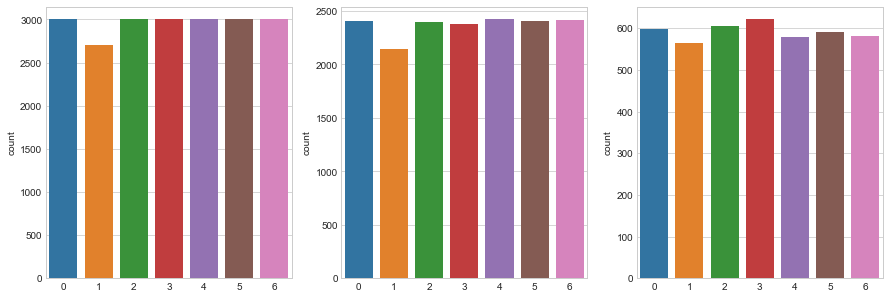

In [19]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=Y, ax=axis1)
sns.countplot(x=Y_train, ax=axis2)
sns.countplot(x=Y_test, ax=axis3)
print(set(Y))

In [23]:
sess = tf.InteractiveSession()
Y_train = sess.run(tf.one_hot(Y_train, len(set(Y))))
Y_test = sess.run(tf.one_hot(Y_test, len(set(Y))))
print([len(X_train),len(X_train[0])], [len(Y_train),len(Y_train[0])], [len(X_test),len(X_test[0])], [len(Y_test),len(Y_test[0])])

[16564, 200] [16564, 7] [4141, 200] [4141, 7]


### CNN 그래프 만들기

In [20]:
embed_dict = np.array([model[i] for i in list(model.wv.vocab)], dtype='float16')

In [21]:
len(embed_dict[0])

200

In [24]:
tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

# hyper parameters
learning_rate = 0.002
batch_size = 50
epoch = 30
lyric_size = 200
embed_dim = 200
lable_dim = len(Y_train[0])
dropout = 0.5
kernel = 250
ALPHA = 0.01

# input place holders
# X = tf.placeholder(tf.float32, [None, lyric_size*embed_dim])
X = tf.placeholder(tf.float32, [None, lyric_size])
Y = tf.placeholder(tf.float32, [None, lable_dim])
# X_img = tf.reshape(X, [-1, lyric_size, embed_dim, 1])   # img 26x24x1 (black/white)

# embedding
embeddings = tf.Variable(embed_dict)
X_img = tf.nn.embedding_lookup(embeddings, X)
X_img = tf.reshape(X_img, [-1, lyric_size, embed_dim, 1])   # img 26x24x1 (black/white)

# L1 ImgIn shape=(?, 26, 24, 1)
W1 = tf.Variable(tf.random_normal([3, embed_dim, 1, kernel], stddev=0.01))
#    Conv     -> (?, 26, 1, 32)
#    Pool     -> (?, 13, 12, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='VALID')
L1 = tf.nn.tanh(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, (lyric_size-2), 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
# <tf.Tensor 'MaxPool:0' shape=(?, 1, 1, 250) dtype=float32>

L2_flat = tf.reshape(L1, [-1, 1 * kernel])

keep_prob = tf.placeholder(tf.float32)
# W3 = tf.get_variable("W3", shape=[1*(lyric_size-2)*kernel, 400],
#                      initializer=tf.contrib.layers.xavier_initializer())
# b3 = tf.Variable(tf.random_normal([400]))
# L3 = tf.nn.relu(tf.matmul(L2_flat, W3)+b3)
# L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[1*kernel, lable_dim], initializer=tf.contrib.layers.xavier_initializer())
# W4 = tf.get_variable("W4", shape=[400, lable_dim], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([lable_dim]))
hypothesis = tf.nn.softmax(tf.matmul(L2_flat, W4)+b4)


cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
# Regularization
# regularzers = tf.nn.l2_loss(W3)
# cost = tf.reduce_mean(cost+regularzers*ALPHA)

train_step = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(cost)
# train_step = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

total_iter = epoch*int(len(X_train)/batch_size) # 총 학습횟수
print('total iteration:', total_iter, '...')

KeyboardInterrupt: 

In [247]:
# prop 전체 테스트셋에서 몇 %나 사용할지
def calc_test_acc(prop):
    val_accuracy = 0
    cost_ = 0
    iteration = int(len(Y_test)/batch_size*prop)
    # 계속 같은 데이터 부분만 사용할것
    batch_for_acc = getMiniBatch(X_test, Y_test, batch_size)
    for i in range(iteration):
        X_test_acc, Y_test_acc = next(batch_for_acc)
        val_accuracy += accuracy.eval(feed_dict={X:X_test_acc, Y:Y_test_acc, keep_prob:1})
        cost_ += cost.eval(feed_dict={X:X_test_acc, Y:Y_test_acc, keep_prob:1})
    return val_accuracy/iteration, cost_/iteration

In [255]:
s_time = time.time()
#----------------------
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
batch = getMiniBatch(X_train, Y_train, batch_size)
batch_for_acc = getMiniBatch(X_test, Y_test, batch_size)

for i in range(total_iter):
    X_, Y_ = next(batch) # 미니배치 할당
    train_step.run(feed_dict={X:X_, Y:Y_, keep_prob:dropout})

#   아래에 결과 프린트용
    if i % 10 == 0:   
#     if i % int(total_iter/100) == 0:  
        X_test_acc, Y_test_acc = next(batch_for_acc)
        train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_, keep_prob:1})
        val_accuracy,cost_ = calc_test_acc(.05)
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        x_range.append(i)
        print('step %d: acc_tr %g, acc_tt %g, cost_tt %g' % (i, train_accuracy, val_accuracy, cost_))
# -------------------------
e_time = time.time()
print('%s sec' %(e_time - s_time))

step 0: acc_tr 0.26, acc_tt 0.095, cost_tt 2.91
step 10: acc_tr 0.12, acc_tt 0.11, cost_tt 2.28575
step 20: acc_tr 0.2, acc_tt 0.11, cost_tt 2.08469
step 30: acc_tr 0.26, acc_tt 0.125, cost_tt 1.99862
step 40: acc_tr 0.26, acc_tt 0.145, cost_tt 1.96517
step 50: acc_tr 0.2, acc_tt 0.16, cost_tt 1.9512
step 60: acc_tr 0.36, acc_tt 0.215, cost_tt 1.92363
step 70: acc_tr 0.34, acc_tt 0.205, cost_tt 1.91163
step 80: acc_tr 0.3, acc_tt 0.275, cost_tt 1.89368
step 90: acc_tr 0.32, acc_tt 0.29, cost_tt 1.89512
step 100: acc_tr 0.36, acc_tt 0.285, cost_tt 1.8809
step 110: acc_tr 0.24, acc_tt 0.215, cost_tt 1.88531
step 120: acc_tr 0.34, acc_tt 0.32, cost_tt 1.86464
step 130: acc_tr 0.46, acc_tt 0.32, cost_tt 1.85832
step 140: acc_tr 0.4, acc_tt 0.335, cost_tt 1.84632
step 150: acc_tr 0.36, acc_tt 0.35, cost_tt 1.84787
step 160: acc_tr 0.34, acc_tt 0.34, cost_tt 1.84533
step 170: acc_tr 0.44, acc_tt 0.355, cost_tt 1.83993
step 180: acc_tr 0.34, acc_tt 0.33, cost_tt 1.82863
step 190: acc_tr 0.38,

step 1570: acc_tr 0.52, acc_tt 0.455, cost_tt 1.48635
step 1580: acc_tr 0.42, acc_tt 0.455, cost_tt 1.48669
step 1590: acc_tr 0.6, acc_tt 0.46, cost_tt 1.49306
step 1600: acc_tr 0.34, acc_tt 0.45, cost_tt 1.48873
step 1610: acc_tr 0.44, acc_tt 0.45, cost_tt 1.48677
step 1620: acc_tr 0.4, acc_tt 0.43, cost_tt 1.49247
step 1630: acc_tr 0.36, acc_tt 0.445, cost_tt 1.48497
step 1640: acc_tr 0.54, acc_tt 0.435, cost_tt 1.48612
step 1650: acc_tr 0.52, acc_tt 0.42, cost_tt 1.4863
step 1660: acc_tr 0.64, acc_tt 0.445, cost_tt 1.4894
step 1670: acc_tr 0.58, acc_tt 0.415, cost_tt 1.48939
step 1680: acc_tr 0.5, acc_tt 0.425, cost_tt 1.49354
step 1690: acc_tr 0.6, acc_tt 0.42, cost_tt 1.49471
step 1700: acc_tr 0.48, acc_tt 0.4, cost_tt 1.4954
step 1710: acc_tr 0.48, acc_tt 0.42, cost_tt 1.49929
step 1720: acc_tr 0.5, acc_tt 0.405, cost_tt 1.48905
step 1730: acc_tr 0.62, acc_tt 0.41, cost_tt 1.48569
step 1740: acc_tr 0.48, acc_tt 0.435, cost_tt 1.47771
step 1750: acc_tr 0.52, acc_tt 0.42, cost_tt 1

step 3120: acc_tr 0.44, acc_tt 0.455, cost_tt 1.42642
step 3130: acc_tr 0.6, acc_tt 0.435, cost_tt 1.42476
step 3140: acc_tr 0.54, acc_tt 0.44, cost_tt 1.43621
step 3150: acc_tr 0.62, acc_tt 0.44, cost_tt 1.44393
step 3160: acc_tr 0.64, acc_tt 0.415, cost_tt 1.43649
step 3170: acc_tr 0.62, acc_tt 0.45, cost_tt 1.43539
step 3180: acc_tr 0.7, acc_tt 0.45, cost_tt 1.4354
step 3190: acc_tr 0.64, acc_tt 0.445, cost_tt 1.42931
step 3200: acc_tr 0.6, acc_tt 0.445, cost_tt 1.42744
step 3210: acc_tr 0.62, acc_tt 0.44, cost_tt 1.43095
step 3220: acc_tr 0.64, acc_tt 0.455, cost_tt 1.43605
step 3230: acc_tr 0.6, acc_tt 0.46, cost_tt 1.42423
step 3240: acc_tr 0.5, acc_tt 0.47, cost_tt 1.4237
step 3250: acc_tr 0.68, acc_tt 0.485, cost_tt 1.42933
step 3260: acc_tr 0.48, acc_tt 0.45, cost_tt 1.42492
step 3270: acc_tr 0.5, acc_tt 0.46, cost_tt 1.42314
step 3280: acc_tr 0.5, acc_tt 0.45, cost_tt 1.42971
step 3290: acc_tr 0.52, acc_tt 0.455, cost_tt 1.42142
step 3300: acc_tr 0.54, acc_tt 0.44, cost_tt 1.

step 4670: acc_tr 0.68, acc_tt 0.45, cost_tt 1.40478
step 4680: acc_tr 0.62, acc_tt 0.47, cost_tt 1.40945
step 4690: acc_tr 0.64, acc_tt 0.455, cost_tt 1.4104
step 4700: acc_tr 0.54, acc_tt 0.45, cost_tt 1.40634
step 4710: acc_tr 0.7, acc_tt 0.455, cost_tt 1.40719
step 4720: acc_tr 0.64, acc_tt 0.45, cost_tt 1.39579
step 4730: acc_tr 0.62, acc_tt 0.465, cost_tt 1.39304
step 4740: acc_tr 0.76, acc_tt 0.45, cost_tt 1.40114
step 4750: acc_tr 0.72, acc_tt 0.475, cost_tt 1.38848
step 4760: acc_tr 0.6, acc_tt 0.46, cost_tt 1.40342
step 4770: acc_tr 0.56, acc_tt 0.485, cost_tt 1.39421
step 4780: acc_tr 0.52, acc_tt 0.48, cost_tt 1.39041
step 4790: acc_tr 0.64, acc_tt 0.47, cost_tt 1.38924
step 4800: acc_tr 0.58, acc_tt 0.47, cost_tt 1.39993
step 4810: acc_tr 0.74, acc_tt 0.46, cost_tt 1.4088
step 4820: acc_tr 0.68, acc_tt 0.45, cost_tt 1.40089
step 4830: acc_tr 0.7, acc_tt 0.465, cost_tt 1.40057
step 4840: acc_tr 0.72, acc_tt 0.465, cost_tt 1.39927
step 4850: acc_tr 0.68, acc_tt 0.475, cost_t

step 6210: acc_tr 0.76, acc_tt 0.495, cost_tt 1.38098
step 6220: acc_tr 0.66, acc_tt 0.475, cost_tt 1.37453
step 6230: acc_tr 0.7, acc_tt 0.505, cost_tt 1.37138
step 6240: acc_tr 0.5, acc_tt 0.51, cost_tt 1.37419
step 6250: acc_tr 0.66, acc_tt 0.475, cost_tt 1.36958
step 6260: acc_tr 0.78, acc_tt 0.49, cost_tt 1.36966
step 6270: acc_tr 0.64, acc_tt 0.475, cost_tt 1.37497
step 6280: acc_tr 0.7, acc_tt 0.495, cost_tt 1.36887
step 6290: acc_tr 0.8, acc_tt 0.485, cost_tt 1.37268
step 6300: acc_tr 0.78, acc_tt 0.505, cost_tt 1.37106
step 6310: acc_tr 0.8, acc_tt 0.51, cost_tt 1.37161
step 6320: acc_tr 0.62, acc_tt 0.485, cost_tt 1.3778
step 6330: acc_tr 0.72, acc_tt 0.475, cost_tt 1.38043
step 6340: acc_tr 0.68, acc_tt 0.48, cost_tt 1.38537
step 6350: acc_tr 0.72, acc_tt 0.46, cost_tt 1.38575
step 6360: acc_tr 0.6, acc_tt 0.465, cost_tt 1.3826
step 6370: acc_tr 0.7, acc_tt 0.485, cost_tt 1.38275
step 6380: acc_tr 0.66, acc_tt 0.48, cost_tt 1.37126
step 6390: acc_tr 0.68, acc_tt 0.485, cost_

ValueError: setting an array element with a sequence.

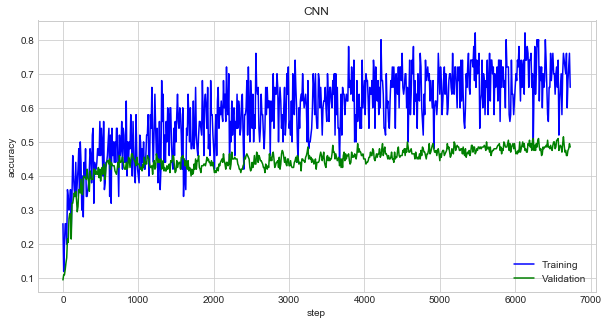

In [256]:
plt.figure(figsize=(10,5))
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('CNN')
plt.show()

In [258]:
%%time
v,c = calc_test_acc(1)
print('전체 테스트셋 정확도:',v, ', 전체 테스트셋 코스트:',c)

전체 테스트셋 정확도: 0.519512180512 , 전체 테스트셋 코스트: 1.33189475972
Wall time: 25.1 s


[[ 206.   30.   87.   52.  115.   43.   65.]
 [  32.  205.   32.  136.   88.   41.   31.]
 [  25.    6.  424.   20.   44.   47.   40.]
 [  11.   54.   16.  447.   55.   31.    7.]
 [  75.   45.   22.   81.  269.   53.   34.]
 [  45.   36.  120.  121.   80.  150.   38.]
 [  26.   10.   22.   14.   53.   11.  446.]]


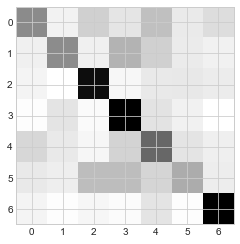

In [257]:
X_all_test = tok_embedding(X_test)
xxx = predicted.eval(feed_dict={X:X_all_test, keep_prob:1})
yyy = sess.run(tf.arg_max(Y_test, 1))
dim = len(Y_test[0])
image = np.zeros(dim*dim)

for i, el in enumerate(xxx):
    cell = el+yyy[i]*dim
    image[cell] +=1

dist = image.reshape(dim,dim)
dist_avg = dist/dist.sum(axis=1)
print(dist)
plt.imshow(image.reshape(dim,dim), cmap='binary')